In [48]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import random

# Generate Assorment Data

* Retail Price - (10-500, normal distibution)
* Cost Price - (random .3 - .7 of retail)
* Current Units OH - (random 10-500)
* Units Sold - (random 10-500)   


* Style # - random
* Style description - text (random combination of three words?)
* Weeks of Supply - calculated

In [132]:
retail_raw = scs.skewnorm.rvs(a=50, loc=20, scale=100, size=1000)

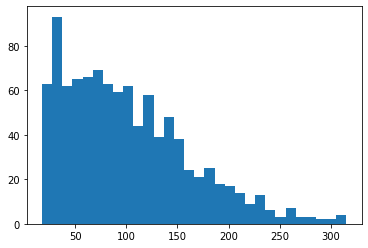

In [133]:
plt.hist(retail_raw, bins=30)
plt.show()

In [134]:
min(retail_raw)

17.61424228199908

In [135]:
retail = []
for item in retail_raw:
    retail.append(item // 1 + 0.99)

In [136]:
style_num = np.random.randint(100000000, 999999999, size=1000)

In [137]:
df = pd.DataFrame(retail, index=style_num)
df.reset_index(inplace=True)

In [138]:
df.columns = ["style_num", "retail"]

In [139]:
pcts = []
for i in range(1000):
    pcts.append(random.uniform(0.3, 0.7))

In [140]:
df["cost"] = df['retail'] * pcts

In [141]:
df

,style_num,retail,cost
0,222377895,143.99,47.086793
1,204244821,123.99,62.535293
2,790367249,60.99,37.266936
3,107190761,88.99,61.821575
4,402614351,42.99,17.143639
...,...,...,...
995,993176905,146.99,96.470813
996,974805450,19.99,8.519089
997,411808293,150.99,70.453341
998,990652947,120.99,39.847528
